## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_csv("diabetes.csv")


## Data analysis

In [2]:
#Summary
print(data.head())
print(data.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [3]:
#Preprocessing 
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

sc = StandardScaler()
X = sc.fit_transform(X)


## Data Splitting/Preparation

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model building

In [5]:
# Logistic Regression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

# Decision Tree
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Random Forest
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# Predict probabilities for each model
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]
y_pred_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# ROC curve and AUC
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_prob_logreg)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, y_pred_prob_dtc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_prob_rfc)

auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)
auc_dtc = roc_auc_score(y_test, y_pred_prob_dtc)
auc_rfc = roc_auc_score(y_test, y_pred_prob_rfc)

# Confusion Matrix and Classification Report
y_pred_logreg = logreg.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

cr_logreg = classification_report(y_test, y_pred_logreg)
cr_dtc = classification_report(y_test, y_pred_dtc)
cr_rfc = classification_report(y_test, y_pred_rfc)

## Model evaluation

In [6]:
# Print the results
print("Logistic Regression\nAUC: ", auc_logreg, "\nConfusion Matrix:\n", cm_logreg, "\nClassification Report:\n", cr_logreg)
print("Decision Trees\nAUC: ", auc_dtc, "\nConfusion Matrix:\n", cm_dtc, "\nClassification Report:\n", cr_dtc)
print("Random Forest\nAUC: ", auc_rfc, "\nConfusion Matrix:\n", cm_rfc, "\nClassification Report:\n", cr_rfc)

Logistic Regression
AUC:  0.8661761781666335 
Confusion Matrix:
 [[98  9]
 [18 29]] 
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Decision Trees
AUC:  0.7316563929210578 
Confusion Matrix:
 [[86 21]
 [16 31]] 
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       107
           1       0.60      0.66      0.63        47

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154

Random Forest
AUC:  0.8477828594153908 
Confusion Matrix:
 [[92 15]
 [18 29]] 
Classification Report:
               precision    rec

## Region of Convergence

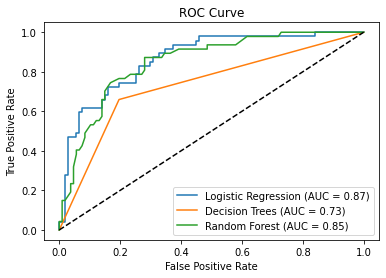

Logistic Regression with LDA
AUC:  0.8767150526943727 
Confusion Matrix:
 [[99  8]
 [18 29]] 
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.78      0.62      0.69        47

    accuracy                           0.83       154
   macro avg       0.81      0.77      0.79       154
weighted avg       0.83      0.83      0.82       154

Decision Trees with LDA
AUC:  0.6538079140982302 
Confusion Matrix:
 [[83 24]
 [22 25]] 
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       107
           1       0.51      0.53      0.52        47

    accuracy                           0.70       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.70      0.70      0.70       154

Random Forest with LDA
AUC:  0.7926029031616624 
Confusion Matrix:
 [[83 24]
 [22 25]] 
Classification Report:
    

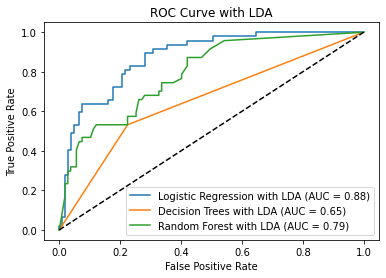

In [8]:
#Plot ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression (AUC = {:.2f})".format(auc_logreg))
plt.plot(fpr_dtc, tpr_dtc, label="Decision Trees (AUC = {:.2f})".format(auc_dtc))
plt.plot(fpr_rfc, tpr_rfc, label="Random Forest (AUC = {:.2f})".format(auc_rfc))
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Split LDA data into training and testing sets
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=0)

# Logistic Regression with LDA
logreg_lda = LogisticRegression(random_state=0)
logreg_lda.fit(X_train_lda, y_train)

# Decision Tree with LDA
dtc_lda = DecisionTreeClassifier(random_state=0)
dtc_lda.fit(X_train_lda, y_train)

# Random Forest with LDA
rfc_lda = RandomForestClassifier(random_state=0)
rfc_lda.fit(X_train_lda, y_train)

# Predict probabilities for each model
y_pred_prob_logreg_lda = logreg_lda.predict_proba(X_test_lda)[:, 1]
y_pred_prob_dtc_lda = dtc_lda.predict_proba(X_test_lda)[:, 1]
y_pred_prob_rfc_lda = rfc_lda.predict_proba(X_test_lda)[:, 1]

# ROC curve and AUC
fpr_logreg_lda, tpr_logreg_lda, thresholds_logreg_lda = roc_curve(y_test, y_pred_prob_logreg_lda)
fpr_dtc_lda, tpr_dtc_lda, thresholds_dtc_lda = roc_curve(y_test, y_pred_prob_dtc_lda)
fpr_rfc_lda, tpr_rfc_lda, thresholds_rfc_lda = roc_curve(y_test, y_pred_prob_rfc_lda)

auc_logreg_lda = roc_auc_score(y_test, y_pred_prob_logreg_lda)
auc_dtc_lda = roc_auc_score(y_test, y_pred_prob_dtc_lda)
auc_rfc_lda = roc_auc_score(y_test, y_pred_prob_rfc_lda)

# Confusion Matrix and Classification Report
y_pred_logreg_lda = logreg_lda.predict(X_test_lda)
y_pred_dtc_lda = dtc_lda.predict(X_test_lda)
y_pred_rfc_lda = rfc_lda.predict(X_test_lda)

cm_logreg_lda = confusion_matrix(y_test, y_pred_logreg_lda)
cm_dtc_lda = confusion_matrix(y_test, y_pred_dtc_lda)
cm_rfc_lda = confusion_matrix(y_test, y_pred_rfc_lda)


#Print the results for each model with LDA
cr_logreg_lda = classification_report(y_test, y_pred_logreg_lda)
cr_dtc_lda = classification_report(y_test, y_pred_dtc_lda)
cr_rfc_lda = classification_report(y_test, y_pred_rfc_lda)

print("Logistic Regression with LDA\nAUC: ", auc_logreg_lda, "\nConfusion Matrix:\n", cm_logreg_lda, "\nClassification Report:\n", cr_logreg_lda)
print("Decision Trees with LDA\nAUC: ", auc_dtc_lda, "\nConfusion Matrix:\n", cm_dtc_lda, "\nClassification Report:\n", cr_dtc_lda)
print("Random Forest with LDA\nAUC: ", auc_rfc_lda, "\nConfusion Matrix:\n", cm_rfc_lda, "\nClassification Report:\n", cr_rfc_lda)

#Plot ROC curve
plt.plot(fpr_logreg_lda, tpr_logreg_lda, label="Logistic Regression with LDA (AUC = {:.2f})".format(auc_logreg_lda))
plt.plot(fpr_dtc_lda, tpr_dtc_lda, label="Decision Trees with LDA (AUC = {:.2f})".format(auc_dtc_lda))
plt.plot(fpr_rfc_lda, tpr_rfc_lda, label="Random Forest with LDA (AUC = {:.2f})".format(auc_rfc_lda))
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with LDA")
plt.legend()
plt.show()

